In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

dataset = pd.read_csv('./SuperstoreDataset.csv')
dataset = dataset.drop(columns=["Customer Name","Country","Postal Code","Unnamed: 17"]).sort_values(["Region","State","City"],ascending=[True,True,True])[["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category","Ship Mode","Sales","Quantity","Discount","Profit"]].reset_index().drop(columns=["index"])
dataset

,Region,State,City,Customer ID,Segment,Product ID,Product Name,Category,Sub-Category,Ship Mode,Sales,Quantity,Discount,Profit
0,Central,Illinois,Arlington Heights,SC-20845,Consumer,OFF-AR-10003394,Newell 332,Office Supplies,Art,Standard Class,14.112,6,0.2,1.2348
1,Central,Illinois,Aurora,EH-14125,Home Office,FUR-CH-10001215,Global Troy Executive Leather Low-Back Tilter,Furniture,Chairs,Same Day,701.372,2,0.3,-50.0980
2,Central,Illinois,Aurora,EH-14125,Home Office,OFF-BI-10004654,Avery Binding System Hidden Tab Executive Styl...,Office Supplies,Binders,Same Day,2.308,2,0.8,-3.4620
3,Central,Illinois,Aurora,JK-16120,Home Office,FUR-FU-10003394,"Tenex ""The Solids"" Textured Chair Mats",Furniture,Furnishings,Standard Class,83.952,3,0.6,-90.2484
4,Central,Illinois,Aurora,CK-12760,Corporate,FUR-TA-10002958,"Bevis Oval Conference Table, Walnut",Furniture,Tables,Standard Class,652.450,5,0.5,-430.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,West,Washington,Vancouver,AR-10825,Corporate,TEC-PH-10003273,AT&T TR1909W,Technology,Phones,Second Class,302.376,3,0.2,22.6782
9990,West,Washington,Vancouver,AR-10825,Corporate,TEC-AC-10001142,First Data FD10 PIN Pad,Technology,Accessories,Second Class,316.000,4,0.0,31.6000
9991,West,Washington,Vancouver,FM-14290,Home Office,OFF-AR-10002956,Boston 16801 Nautilus Battery Pencil Sharpener,Office Supplies,Art,Standard Class,44.020,2,0.0,11.4452
9992,West,Washington,Vancouver,JW-15220,Corporate,FUR-FU-10002885,Magna Visual Magnetic Picture Hangers,Furniture,Furnishings,Standard Class,9.640,2,0.0,3.6632


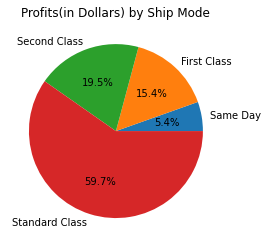

In [12]:
# setting up data by ship mode
shipmode = dataset.groupby('Ship Mode')
shipmode_df = pd.DataFrame(shipmode['Ship Mode'].count())
shipmode_df.index.name = None
shipmode_df['Count']=shipmode_df['Ship Mode']
shipmode_df = shipmode_df.drop(columns=['Ship Mode'])
shipmode_df.index.name = 'Ship Mode'
shipmode_df = shipmode_df.sort_values('Count').reset_index()

# chart of profits per ship mode
fig = plt.pie(shipmode_df['Count'],labels=list(shipmode_df['Ship Mode']),autopct='%1.1f%%') #https://datatofish.com/pie-chart-matplotlib/
plt.title('Profits(in Dollars) by Ship Mode')
plt.savefig("./Charts by Ship Mode/Profits_by_Ship_Mode.png", dpi=200)

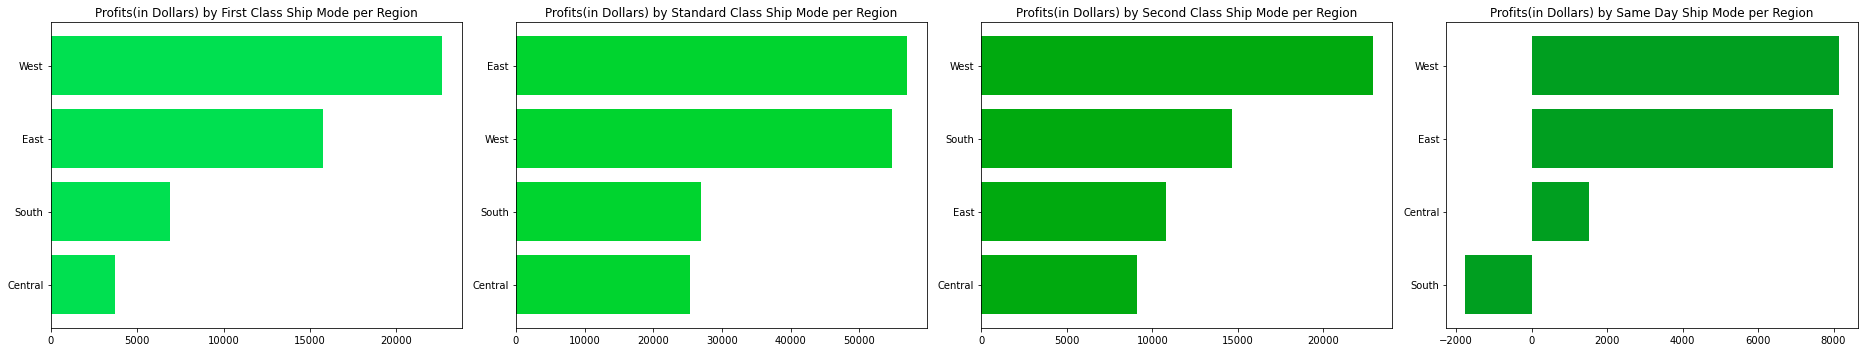

<Figure size 1080x432 with 0 Axes>

In [13]:
# dataframe per class
fstclass_df = dataset[dataset['Ship Mode']=='First Class'].drop(columns=["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])
stdclass_df = dataset[dataset['Ship Mode']=='Standard Class'].drop(columns=["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])
scdclass_df = dataset[dataset['Ship Mode']=='Second Class'].drop(columns=["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])
sameday_df = dataset[dataset['Ship Mode']=='Same Day'].drop(columns=["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])

# profit by region
fstclass_bylocation = dataset[dataset['Ship Mode']=='First Class'].drop(columns=["Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])
fstclass_region = fstclass_bylocation.groupby('Region').sum().sort_values('Profit').reset_index()

stdclass_bylocation = dataset[dataset['Ship Mode']=='Standard Class'].drop(columns=["Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])
stdclass_region = stdclass_bylocation.groupby('Region').sum().sort_values('Profit').reset_index()

scdclass_bylocation = dataset[dataset['Ship Mode']=='Second Class'].drop(columns=["Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])
scdclass_region = scdclass_bylocation.groupby('Region').sum().sort_values('Profit').reset_index()

sameday_bylocation = dataset[dataset['Ship Mode']=='Same Day'].drop(columns=["Customer ID","Segment","Product ID","Product Name","Category","Sub-Category"])
sameday_region = sameday_bylocation.groupby('Region').sum().sort_values('Profit').reset_index()

# plotting profits per class by region
fig,ax = plt.subplots(1,4)
plt.figure(figsize=(15, 6))
fig.set_size_inches(26,5)

ax[0].barh(y = fstclass_region['Region'], width = fstclass_region['Profit'],color='#00e050')
ax[0].set_title('Profits(in Dollars) by First Class Ship Mode per Region') # https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
ax[1].barh(y = stdclass_region['Region'],width = stdclass_region['Profit'],color='#00d42f')
ax[1].set_title('Profits(in Dollars) by Standard Class Ship Mode per Region')
ax[2].barh(y = scdclass_region['Region'], width = scdclass_region['Profit'],color='#00aa0f')
ax[2].set_title('Profits(in Dollars) by Second Class Ship Mode per Region')
ax[3].barh(y = sameday_region['Region'],width = sameday_region['Profit'],color='#009f20')
ax[3].set_title('Profits(in Dollars) by Same Day Ship Mode per Region')

fig.tight_layout()
plt.show()
fig.savefig("./Charts by Ship Mode/Profits_by_ShipMode_per_Region.png", dpi=200)

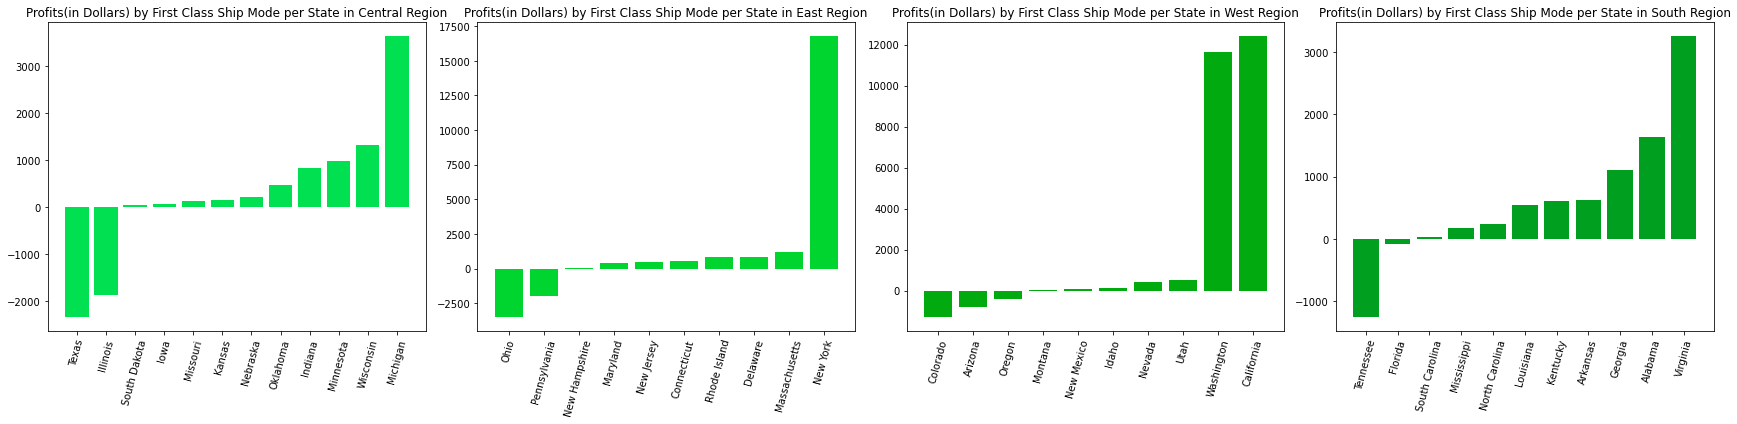

In [17]:
# profit by first class per region & state
# grouping by region
fstclass_bycentral = fstclass_bylocation[fstclass_bylocation['Region']=='Central'].drop(columns=['City','Ship Mode'])
fstclass_bycentral = fstclass_bycentral.groupby('State').sum().sort_values("Profit").reset_index()

fstclass_byeast = fstclass_bylocation[fstclass_bylocation['Region']=='East'].drop(columns=['City','Ship Mode'])
fstclass_byeast = fstclass_byeast.groupby('State').sum().sort_values("Profit").reset_index()

fstclass_bywest = fstclass_bylocation[fstclass_bylocation['Region']=='West'].drop(columns=['City','Ship Mode'])
fstclass_bywest = fstclass_bywest.groupby('State').sum().sort_values("Profit").reset_index()

fstclass_bysouth = fstclass_bylocation[fstclass_bylocation['Region']=='South'].drop(columns=['City','Ship Mode'])
fstclass_bysouth = fstclass_bysouth.groupby('State').sum().sort_values("Profit").reset_index()

# plotting
fig,ax = plt.subplots(1,4)
fig.set_size_inches(24,6)

ax[0].bar(x = fstclass_bycentral['State'], height = fstclass_bycentral['Profit'],color='#00e050')
ax[0].tick_params(axis='x', rotation=75) # https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec/52461208
ax[0].set_title('Profits(in Dollars) by First Class Ship Mode per State in Central Region')
ax[1].bar(x = fstclass_byeast['State'], height = fstclass_byeast['Profit'],color='#00d42f')
ax[1].tick_params(axis='x', rotation=75)
ax[1].set_title('Profits(in Dollars) by First Class Ship Mode per State in East Region')
ax[2].bar(x = fstclass_bywest['State'], height = fstclass_bywest['Profit'],color='#00aa0f')
ax[2].tick_params(axis='x', rotation=75)
ax[2].set_title('Profits(in Dollars) by First Class Ship Mode per State in West Region')
ax[3].bar(x = fstclass_bysouth['State'], height = fstclass_bysouth['Profit'],color='#009f20')
ax[3].tick_params(axis='x', rotation=75)
ax[3].set_title('Profits(in Dollars) by First Class Ship Mode per State in South Region')

fig.tight_layout()
plt.show()
fig.savefig("./Charts by Ship Mode/Profits_by_FirstClass_ShipMode_per_State.png", dpi=200)

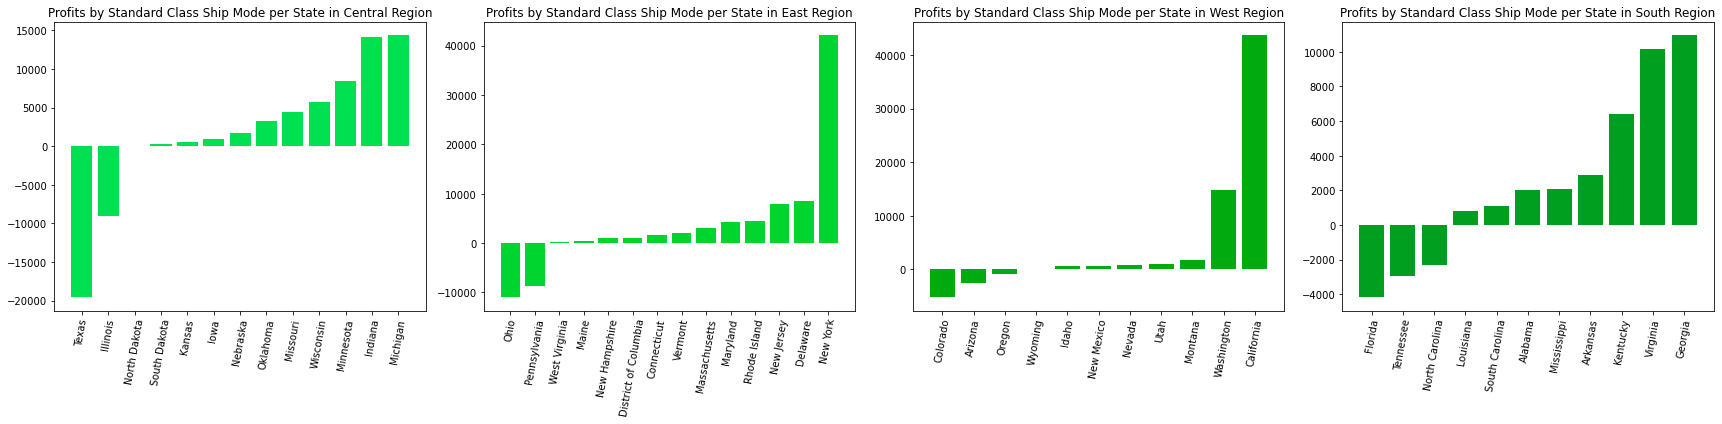

In [16]:
# profit by standard class shipping per region & state
# grouping by region
stdclass_bycentral = stdclass_bylocation[stdclass_bylocation['Region']=='Central'].drop(columns=['City','Ship Mode'])
stdclass_bycentral = stdclass_bycentral.groupby('State').sum().sort_values("Profit").reset_index()

stdclass_byeast = stdclass_bylocation[stdclass_bylocation['Region']=='East'].drop(columns=['City','Ship Mode'])
stdclass_byeast = stdclass_byeast.groupby('State').sum().sort_values("Profit").reset_index()

stdclass_bywest = stdclass_bylocation[stdclass_bylocation['Region']=='West'].drop(columns=['City','Ship Mode'])
stdclass_bywest = stdclass_bywest.groupby('State').sum().sort_values("Profit").reset_index()

stdclass_bysouth = stdclass_bylocation[stdclass_bylocation['Region']=='South'].drop(columns=['City','Ship Mode'])
stdclass_bysouth = stdclass_bysouth.groupby('State').sum().sort_values("Profit").reset_index()

# plotting
fig,ax = plt.subplots(1,4)
fig.set_size_inches(24,6)

ax[0].bar(x = stdclass_bycentral['State'], height = stdclass_bycentral['Profit'],color='#00e050')
ax[0].tick_params(axis='x', rotation=80) 
ax[0].set_title('Profits by Standard Class Ship Mode per State in Central Region')
ax[1].bar(x = stdclass_byeast['State'], height = stdclass_byeast['Profit'],color='#00d42f')
ax[1].tick_params(axis='x', rotation=80)
ax[1].set_title('Profits by Standard Class Ship Mode per State in East Region')
ax[2].bar(x = stdclass_bywest['State'], height = stdclass_bywest['Profit'],color='#00aa0f')
ax[2].tick_params(axis='x', rotation=80)
ax[2].set_title('Profits by Standard Class Ship Mode per State in West Region')
ax[3].bar(x = stdclass_bysouth['State'], height = stdclass_bysouth['Profit'],color='#009f20')
ax[3].tick_params(axis='x', rotation=80)
ax[3].set_title('Profits by Standard Class Ship Mode per State in South Region')

fig.tight_layout()
plt.show()
fig.savefig("./Charts by Ship Mode/Profits_by_StandardClass_ShipMode_per_State.png", dpi=200)

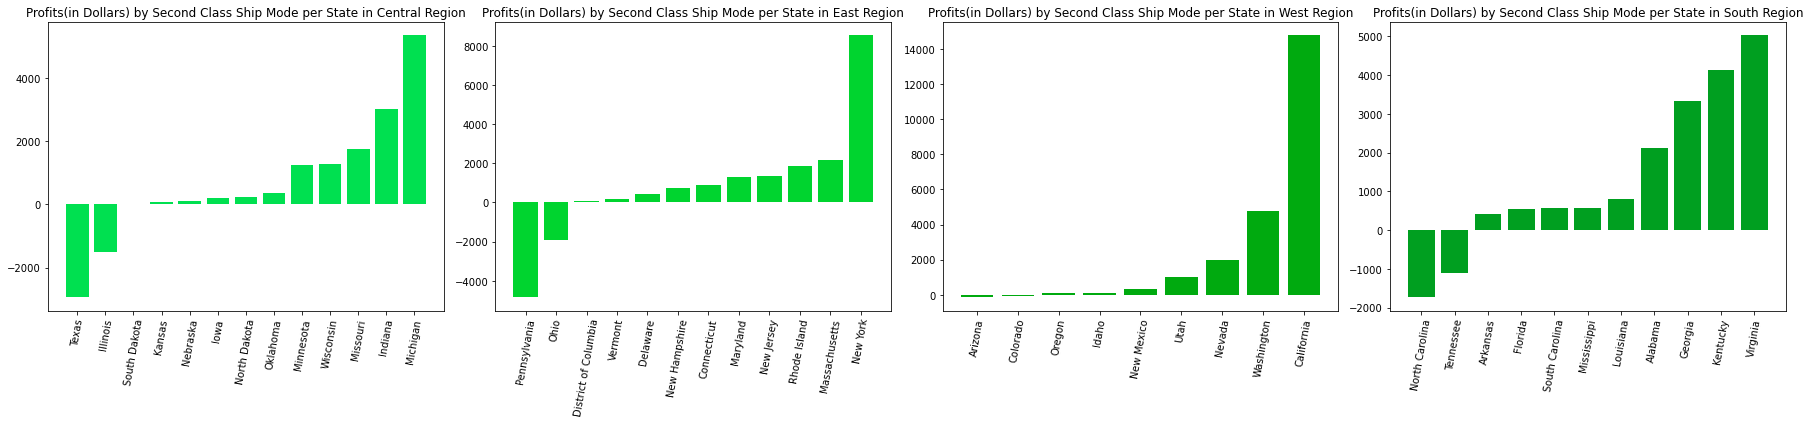

In [18]:
# profit by second class shipping per region & state
# grouping by region
scdclass_bycentral = scdclass_bylocation[scdclass_bylocation['Region']=='Central'].drop(columns=['City','Ship Mode'])
scdclass_bycentral = scdclass_bycentral.groupby('State').sum().sort_values("Profit").reset_index()

scdclass_byeast = scdclass_bylocation[scdclass_bylocation['Region']=='East'].drop(columns=['City','Ship Mode'])
scdclass_byeast = scdclass_byeast.groupby('State').sum().sort_values("Profit").reset_index()

scdclass_bywest = scdclass_bylocation[scdclass_bylocation['Region']=='West'].drop(columns=['City','Ship Mode'])
scdclass_bywest = scdclass_bywest.groupby('State').sum().sort_values("Profit").reset_index()

scdclass_bysouth = scdclass_bylocation[scdclass_bylocation['Region']=='South'].drop(columns=['City','Ship Mode'])
scdclass_bysouth = scdclass_bysouth.groupby('State').sum().sort_values("Profit").reset_index()

# plotting
fig,ax = plt.subplots(1,4)
fig.set_size_inches(25,6)

ax[0].bar(x = scdclass_bycentral['State'], height = scdclass_bycentral['Profit'],color='#00e050')
ax[0].tick_params(axis='x', rotation=80) 
ax[0].set_title('Profits(in Dollars) by Second Class Ship Mode per State in Central Region')
ax[1].bar(x = scdclass_byeast['State'], height = scdclass_byeast['Profit'],color='#00d42f')
ax[1].tick_params(axis='x', rotation=80)
ax[1].set_title('Profits(in Dollars) by Second Class Ship Mode per State in East Region')
ax[2].bar(x = scdclass_bywest['State'], height = scdclass_bywest['Profit'],color='#00aa0f')
ax[2].tick_params(axis='x', rotation=80)
ax[2].set_title('Profits(in Dollars) by Second Class Ship Mode per State in West Region')
ax[3].bar(x = scdclass_bysouth['State'], height = scdclass_bysouth['Profit'],color='#009f20')
ax[3].tick_params(axis='x', rotation=80)
ax[3].set_title('Profits(in Dollars) by Second Class Ship Mode per State in South Region')
fig.tight_layout()
plt.show()
fig.savefig("./Charts by Ship Mode/Profits_by_SecondClass_ShipMode_per_State.png", dpi=200)

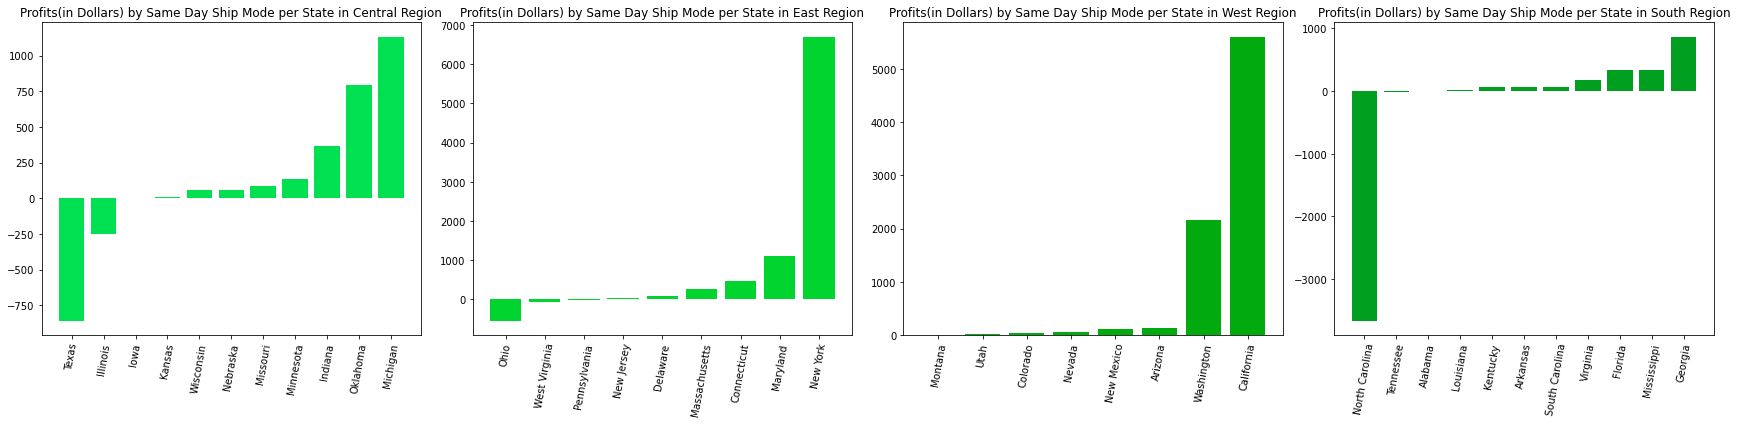

In [19]:
# profit by same day shipping per region & state
# grouping by region
sameday_bycentral = sameday_bylocation[sameday_bylocation['Region']=='Central'].drop(columns=['City','Ship Mode'])
sameday_bycentral = sameday_bycentral.groupby('State').sum().sort_values("Profit").reset_index()

sameday_byeast = sameday_bylocation[sameday_bylocation['Region']=='East'].drop(columns=['City','Ship Mode'])
sameday_byeast = sameday_byeast.groupby('State').sum().sort_values("Profit").reset_index()

sameday_bywest = sameday_bylocation[sameday_bylocation['Region']=='West'].drop(columns=['City','Ship Mode'])
sameday_bywest = sameday_bywest.groupby('State').sum().sort_values("Profit").reset_index()

sameday_bysouth = sameday_bylocation[sameday_bylocation['Region']=='South'].drop(columns=['City','Ship Mode'])
sameday_bysouth = sameday_bysouth.groupby('State').sum().sort_values("Profit").reset_index()

# plotting
fig,ax = plt.subplots(1,4)
fig.set_size_inches(24,6)

ax[0].bar(x = sameday_bycentral['State'], height = sameday_bycentral['Profit'],color='#00e050')
ax[0].tick_params(axis='x', rotation=80) 
ax[0].set_title('Profits(in Dollars) by Same Day Ship Mode per State in Central Region')
ax[1].bar(x = sameday_byeast['State'], height = sameday_byeast['Profit'],color='#00d42f')
ax[1].tick_params(axis='x', rotation=80)
ax[1].set_title('Profits(in Dollars) by Same Day Ship Mode per State in East Region')
ax[2].bar(x = sameday_bywest['State'], height = sameday_bywest['Profit'],color='#00aa0f')
ax[2].tick_params(axis='x', rotation=80)
ax[2].set_title('Profits(in Dollars) by Same Day Ship Mode per State in West Region')
ax[3].bar(x = sameday_bysouth['State'], height = sameday_bysouth['Profit'],color='#009f20')
ax[3].tick_params(axis='x', rotation=80)
ax[3].set_title('Profits(in Dollars) by Same Day Ship Mode per State in South Region')
fig.tight_layout()
plt.show()
fig.savefig("./Charts by Ship Mode/Profits_by_SameDay_ShipMode_per_State.png", dpi=200)